<a href="https://colab.research.google.com/github/faizshareef/CODSOFT/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500  28.0        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250  28.0        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  28.0        S  
Ac

<Axes: xlabel='importance', ylabel='feature'>

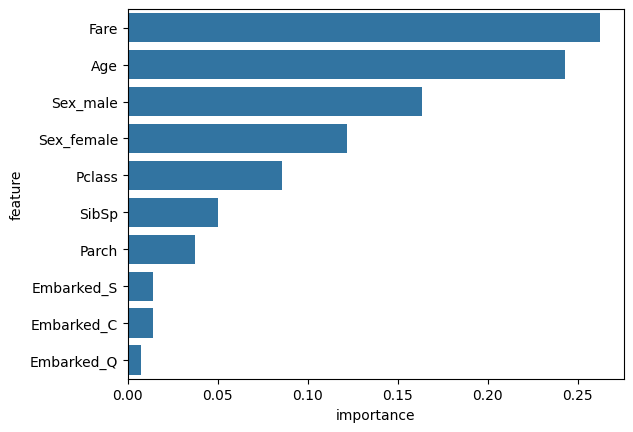

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

df = pd.read_csv('/home/Titanic-Dataset.csv')

df.fillna(df['Age'].median(), inplace=True)

df.fillna(df['Embarked'].mode()[0], inplace=True)

print(df.head())


df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importances = pd.DataFrame({'feature': features, 'importance': clf.feature_importances_}).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

sns.barplot(x='importance', y='feature', data=feature_importances)
